<a href="https://colab.research.google.com/github/21astroboy/NN-ML/blob/main/NN_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
!pip install scikit-optimize

# Импорт

In [46]:
df = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv",index_col = "Person ID")

In [47]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


# Заполнение пропусков

In [48]:
df["Sleep Disorder"].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [49]:
df = df.fillna("None")

In [50]:
df["Sleep Disorder"].value_counts()

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [51]:
df.isna().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [52]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [53]:
df.head(3)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None


# Разбиение, скейлеры, трансформеры

In [54]:
from IPython.display import Image
Image(url='https://media.tenor.com/5qZa2joxmxwAAAAC/transformers-optimus-prime.gif')

In [56]:
from sklearn.model_selection import train_test_split

X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y, shuffle=True)

print("Размер тренировочной выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)


Размер тренировочной выборки: (261, 11)
Размер тестовой выборки: (113, 11)


In [71]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


numeric_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
categorical_features = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Размер предобработанной тренировочной выборки:", X_train_processed.shape)
print("Размер предобработанной тестовой выборки:", X_test_processed.shape)


Размер предобработанной тренировочной выборки: (261, 45)
Размер предобработанной тестовой выборки: (113, 45)


In [72]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
y_train_encoded = label_binarizer.fit_transform(y_train)
y_test_encoded = label_binarizer.transform(y_test)

print("Форма закодированных тренировочных меток:", y_train_encoded.shape)
print("Форма закодированных тестовых меток:", y_test_encoded.shape)


Форма закодированных тренировочных меток: (261, 3)
Форма закодированных тестовых меток: (113, 3)


# Тренируем и тестируем модели

In [16]:
Image(url='https://i.gifer.com/embedded/download/1Fmo.gif')

## Логистическая регрессия

In [17]:
Image(url='https://i.gifer.com/embedded/download/UkJZ.gif')

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

log = OneVsRestClassifier(LogisticRegression())
log.fit(X_train_processed, y_train_encoded)
y_pred_test = log.predict(X_test_processed)
print("Отчет о классификации для логистической регрессии (test):\n", classification_report(y_test_encoded, y_pred_test))


accuracy = accuracy_score(y_test_encoded, y_pred_test)
print()
print()
print("Точность модели на тестовых данных:", accuracy)
print()
print()
print()
print()
print("=======================================================================================")

Отчет о классификации для логистической регрессии (test):
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        23
           1       0.92      0.89      0.91        66
           2       0.79      0.79      0.79        24

   micro avg       0.87      0.86      0.87       113
   macro avg       0.85      0.84      0.84       113
weighted avg       0.87      0.86      0.87       113
 samples avg       0.86      0.86      0.86       113



Точность модели на тестовых данных: 0.8584070796460177






/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Дерево решений

In [18]:
Image(url='https://i.gifer.com/embedded/download/9PZw.gif')

In [84]:
from sklearn.tree import DecisionTreeClassifier
from skopt import BayesSearchCV

search_spaces_tree = {'max_depth': (3, 12)}
tree_clf = DecisionTreeClassifier()
opt_tree_clf = BayesSearchCV(tree_clf, search_spaces_tree, n_iter=50, cv=5)
opt_tree_clf.fit(X_train_processed, y_train_encoded)
best_tree_clf = opt_tree_clf.best_estimator_
y_pred_test_tree = best_tree_clf.predict(X_test_processed)

print()
print()
print()
best_params_tr = opt_tree_clf.best_params_
print("Лучшие параметры дерева:", best_params_tr)
print()
print()
print()
print("Отчет о классификации для дерева решений (test):\n", classification_report(y_test_encoded, y_pred_test_tree))
print()
print()
print()
accuracy_tree = accuracy_score(y_test_encoded, y_pred_test_tree)
print("Точность модели на тестовых данных (дерево решений):", accuracy_tree)
print()
print()
print()
print("======================================================================================================")


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [12] before, using random point [7]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [5] before, using random point [8]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [12] before, using random point [10]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [12] before, using random point [5]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [5] before, using random point [11]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The




Лучшие параметры дерева: OrderedDict([('max_depth', 9)])



Отчет о классификации для дерева решений (test):
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        23
           1       0.92      0.86      0.89        66
           2       0.81      0.88      0.84        24

   micro avg       0.87      0.86      0.87       113
   macro avg       0.85      0.85      0.85       113
weighted avg       0.88      0.86      0.87       113
 samples avg       0.86      0.86      0.86       113




Точность модели на тестовых данных (дерево решений): 0.8584070796460177





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Ближайшие соседи

In [19]:
Image(url='https://www.meme-arsenal.com/memes/f9da68ea699131b5cd2b1dc43aa48a96.jpg')

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from skopt import BayesSearchCV

search_spaces_knn = {'n_neighbors': (1, 10)}
knn_clf = KNeighborsClassifier()
opt_knn_clf = BayesSearchCV(knn_clf, search_spaces_knn, n_iter=50, cv=5)
opt_knn_clf.fit(X_train_processed, y_train_encoded)
best_knn_clf = opt_knn_clf.best_estimator_
y_pred_test_knn = best_knn_clf.predict(X_test_processed)

print()
print()
print()
best_params_knn = opt_knn_clf.best_params_
print("Лучшие параметры ближайших соседей:", best_params_knn)
print()
print()
print()
print("Отчет о классификации для ближайших соседей (test):\n", classification_report(y_test_encoded, y_pred_test_knn))
accuracy_knn = accuracy_score(y_test_encoded, y_pred_test_knn)
print()
print()
print()
print("Точность модели на тестовых данных (ближайшие соседи):", accuracy_knn)
print()
print()
print()
print("==================================================================================================================")


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [9] before, using random point [2]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [3] before, using random point [7]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [3] before, using random point [3]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [3] before, using random point [8]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [3] before, using random point [8]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The obje




Лучшие параметры ближайших соседей: OrderedDict([('n_neighbors', 3)])



Отчет о классификации для ближайших соседей (test):
               precision    recall  f1-score   support

           0       0.73      0.83      0.78        23
           1       0.91      0.89      0.90        66
           2       0.76      0.67      0.71        24

   micro avg       0.84      0.83      0.84       113
   macro avg       0.80      0.80      0.80       113
weighted avg       0.84      0.83      0.83       113
 samples avg       0.83      0.83      0.83       113




Точность модели на тестовых данных (ближайшие соседи): 0.831858407079646





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Случайный лес

In [20]:
Image(url='https://www.meme-arsenal.com/memes/024da96cab1dd7911302ad562411474a.jpg')

In [86]:
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV

search_spaces_rf = {'n_estimators': (50, 200),
                    'max_depth': (3, 20)}
rf_clf = RandomForestClassifier()
opt_rf_clf = BayesSearchCV(rf_clf, search_spaces_rf, n_iter=50, cv=5)
opt_rf_clf.fit(X_train_processed, y_train_encoded)
best_rf_clf = opt_rf_clf.best_estimator_
y_pred_test_rf = best_rf_clf.predict(X_test_processed)

print()
print()
print()
best_params_rf = opt_rf_clf.best_params_
print("Лучшие параметры  леса:", best_params_rf)
print()
print()
print()
print("Отчет о классификации для случайного леса (test):\n", classification_report(y_test_encoded, y_pred_test_rf))
print()
print()
print()
accuracy_rf = accuracy_score(y_test_encoded, y_pred_test_rf)
print("Точность модели на тестовых данных (случайный лес):", accuracy_rf)
print()
print()
print()
print("===============================================================================================================")


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [19, 50] before, using random point [16, 184]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [19, 50] before, using random point [19, 177]
  warnings.warn(





Лучшие параметры  леса: OrderedDict([('max_depth', 8), ('n_estimators', 129)])



Отчет о классификации для случайного леса (test):
               precision    recall  f1-score   support

           0       0.90      0.83      0.86        23
           1       0.92      0.91      0.92        66
           2       0.84      0.88      0.86        24

   micro avg       0.90      0.88      0.89       113
   macro avg       0.89      0.87      0.88       113
weighted avg       0.90      0.88      0.89       113
 samples avg       0.88      0.88      0.88       113




Точность модели на тестовых данных (случайный лес): 0.8849557522123894





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ROC-AUC

In [40]:
!pip install scikit-plot


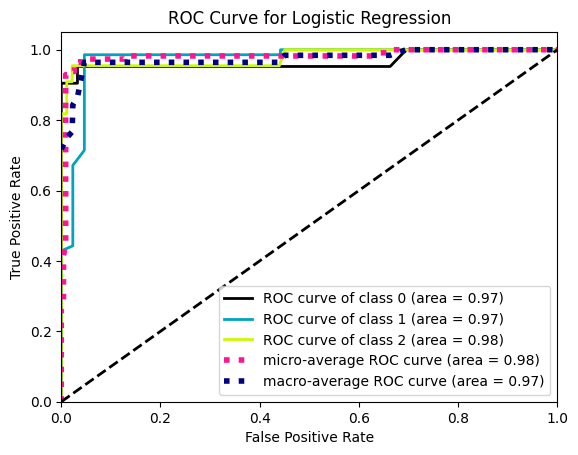

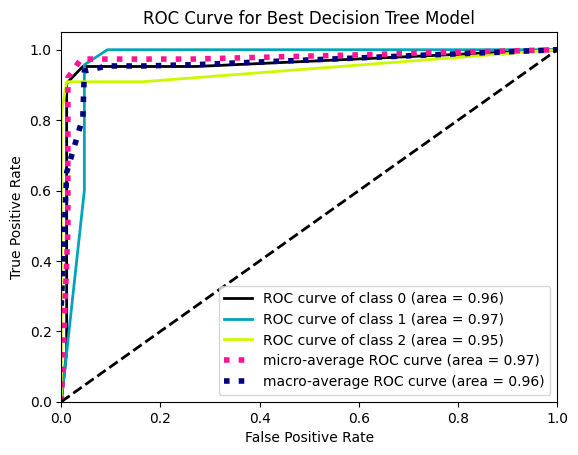

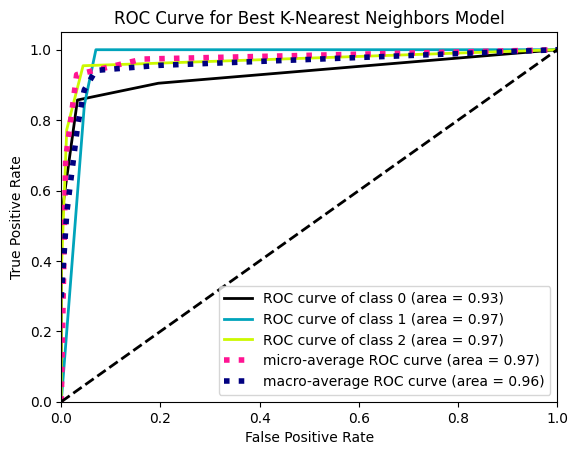

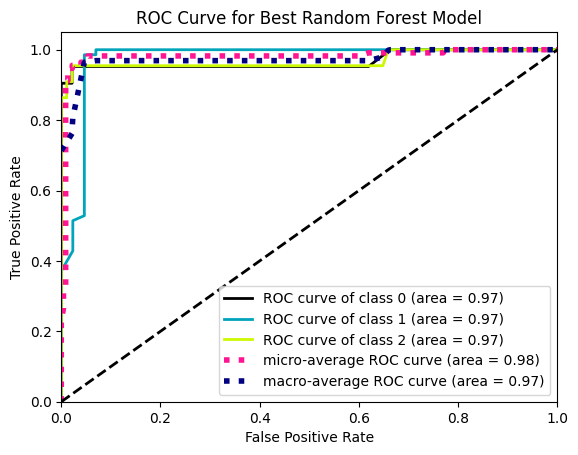

In [42]:
import scikitplot as skplt

# Построение ROC-кривых для логистической регрессии
skplt.metrics.plot_roc(y_test_encoded, y_test_probs_log_reg_ovr)
plt.title('ROC Curve for Logistic Regression')
plt.show()

# Построение ROC-кривых для лучшей модели дерева решений
skplt.metrics.plot_roc(y_test_encoded, y_test_probs_best_tree)
plt.title('ROC Curve for Best Decision Tree Model')
plt.show()

# Построение ROC-кривых для лучшей модели k-ближайших соседей
skplt.metrics.plot_roc(y_test_encoded, y_test_probs_best_knn)
plt.title('ROC Curve for Best K-Nearest Neighbors Model')
plt.show()

# Построение ROC-кривых для лучшей модели случайного леса
skplt.metrics.plot_roc(y_test_encoded, y_test_probs_best_rf)
plt.title('ROC Curve for Best Random Forest Model')
plt.show()
